<hr>
<h1>GL United FC</h1>
<hr>
<i>A new football club named ‘GL United FC’ has just been inaugurated. This club
does not have a team yet. The team is looking to hire players for their roster.
Management wants to make such decisions using a data based approach.</i>

<hr>
<h2>I. Load and explore data</h2>
<hr>

<b>1. Import the required libraries and read the dataset</b>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading CSV dataset
df = pd.read_csv("fifa.csv")

<b>2. Check the first few samples, shape, info of the data</b>

In [3]:
# Checking the first 5 samples
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# Shape of the dataframe
df.shape

(18207, 60)

In [5]:
# Basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

<b>3. Drop the redundant columns</b>

In [6]:
# Dropping redundant columns - Photo, Flag & CLub Logo
df.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<hr>
<h2>II. Data Cleaning and Preprocessing</h2>
<hr>

<b>4. Convert the columns "Value", "Wage", "Release Clause" to float datatype
after getting rid of currency symbol and suffix</b>

In [7]:
# Removing currency symbol - €
# Replacing K with *1000, M with *1000000
# Converting to float datatype
cols = ['Value', 'Wage', 'Release Clause']
df[cols] = df[cols].replace({'€': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


<b>5. Convert the column "Joined" into integer data type with keeping only the
year</b>

In [8]:
# Converting 'Joined' values into datetime type
# Extracting year only
# Converting to pandas Integer
df['Joined'] = pd.to_datetime(df['Joined']).dt.year.astype('Int64')
df.loc[:28, ['Name', 'Joined']]

,Name,Joined
0,L. Messi,2004
1,Cristiano Ronaldo,2018
2,Neymar Jr,2017
3,De Gea,2011
4,K. De Bruyne,2015
5,E. Hazard,2012
6,L. Modrić,2012
7,L. Suárez,2014
8,Sergio Ramos,2005
9,J. Oblak,2014


<b>6. Convert the column "Contract Valid Until" to pandas datetime type</b>

In [9]:
# Converting 'Joined' values into datetime type
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])
df.loc[:5, ['Name', 'Contract Valid Until']]

,Name,Contract Valid Until
0,L. Messi,2021-01-01
1,Cristiano Ronaldo,2022-01-01
2,Neymar Jr,2022-01-01
3,De Gea,2020-01-01
4,K. De Bruyne,2023-01-01
5,E. Hazard,2020-01-01


<b>7. The column 'Height' is in inches with a quotation mark, convert to float
with decimal points</b>

In [10]:
# Splitting 'Height' into feet and inches
feet = df['Height'].str.split('\'', 1).str[0].astype(float)
inches = df['Height'].str.split('\'', 1).str[1].astype(float)

# Converting inches into decimal fraction value 
height = (feet+(inches/12)).round(decimals=2)
df['Height'] = height
df.loc[:5, ['Name', 'Height']]

,Name,Height
0,L. Messi,5.58
1,Cristiano Ronaldo,6.17
2,Neymar Jr,5.75
3,De Gea,6.33
4,K. De Bruyne,5.92
5,E. Hazard,5.67


<b>8. The column "Weight" has the suffix as lbs, remove the suffix and convert
to float</b>

In [11]:
df['Weight'] = df['Weight'].str.removesuffix('lbs').astype(float)
df.loc[:5, ['Name', 'Weight']]

,Name,Weight
0,L. Messi,159.0
1,Cristiano Ronaldo,183.0
2,Neymar Jr,150.0
3,De Gea,168.0
4,K. De Bruyne,154.0
5,E. Hazard,163.0


<b>9. Check for the percentage of missing values and impute them with
appropriate imputation techniques</b>

In [12]:
# Check the percentage of missing values in each column
(df.isnull().sum() * 100 / len(df)).round(3)

ID                           0.000
Name                         0.000
Age                          0.000
Nationality                  0.000
Overall                      0.000
Potential                    0.000
Club                         1.324
Value                        0.000
Wage                         0.000
Preferred Foot               0.264
International Reputation     0.264
Weak Foot                    0.264
Skill Moves                  0.264
Work Rate                    0.264
Body Type                    0.264
Position                     0.330
Jersey Number                0.330
Joined                       8.530
Loaned From                 93.058
Contract Valid Until         1.587
Height                       0.264
Weight                       0.264
Crossing                     0.264
Finishing                    0.264
HeadingAccuracy              0.264
ShortPassing                 0.264
Volleys                      0.264
Dribbling                    0.264
Curve               

In [13]:
# Column 'Loaned From' has over 93% missing values hence dropping it
df.drop('Loaned From', axis=1, inplace=True)

In [14]:
# Imputing missing data
missing = df.isnull().sum()/len(df)

# Getting indexes with missing values
index = [i  for i in missing[missing>0].index]


# Filling null values of numeric columns with their median values
num_col = [i     
           for i in index      
           if i in df.columns and  df[i].dtype!=object]

for col in num_col:
    df[col]=df[col].fillna(df[col].median())

    
# Filling null values of non-numeric columns with their mode values
cat_col = [i     
           for i in index      
           if i in df.columns and  df[i].dtype==object]

for col in cat_col:
    df[col]=df[col].fillna(df[col].mode()[0])
    

# Re-checking missing values
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

<hr>
<h2>III. Exploratory Data Analysis</h2>
<hr>

<b>10. Plot the distribution of Overall rating for all the players and write your
findings</b>

<AxesSubplot:ylabel='Density'>

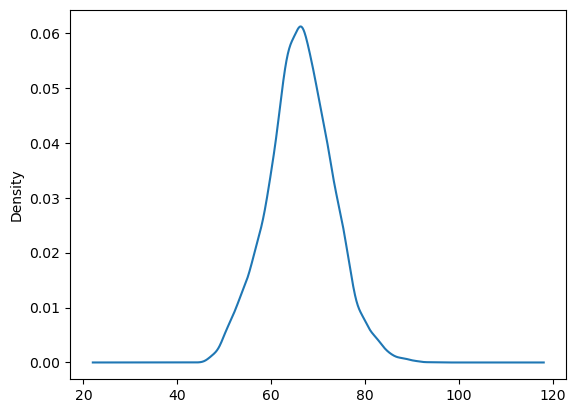

In [15]:
df['Overall'].plot(kind='kde')

<ul>
    <li>From the above density distribution plot we can observe that the overall rating of players ranges between 45-95</li>
    <li>Plot is denser around ratings between 60-70, so there are more players with overall ratings in this range</li>
</ul>

<b>11. Retrieve the names of Top 20 players based on the Overall rating</b>

In [37]:
top20 = df.groupby('Name')['Overall'].max().sort_values(ascending=False).head(20)
top20

Name
Cristiano Ronaldo    94
L. Messi             94
Neymar Jr            92
Sergio Ramos         91
E. Hazard            91
De Gea               91
L. Suárez            91
L. Modrić            91
K. De Bruyne         91
D. Godín             90
David Silva          90
T. Kroos             90
J. Oblak             90
R. Lewandowski       90
H. Kane              89
T. Courtois          89
S. Agüero            89
M. ter Stegen        89
Sergio Busquets      89
E. Cavani            89
Name: Overall, dtype: int64

<b>12. Generate a dataframe which should include all the information of the
Top 20 players based on the Overall rating</b>

In [38]:
df_top20 = df[(df['Name'].isin(top20.index)) & (df['Overall'].isin(top20.values))]
df_top20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


<b>13. What is the average "Age" and "Wage" of these Top 20 players?</b>

In [39]:
df_top20[['Age', 'Wage']].mean()

Age         28.9
Wage    301700.0
dtype: float64

<ul>
    <li>From above data we can see that the average age of the Top 20 players is around 29</li>
    <li>The average wage of the Top 20 players is around €301700.00</li>
</ul>

<b>14. Among the Top 20 players based on the Overall rating, which player has
the highest wage? Display the name of the player with his wage</b>

In [19]:
df_maxwage = df_top20[['Wage']].idxmax()
df.loc[df_maxwage, ['Name', 'Wage']]

,Name,Wage
0,L. Messi,565000.0


<b>15. Generate a dataframe which should include the "Player name", "Club
Name", "Wage", and 'Overall rating'</b>

In [41]:
df_new = df.loc[:, ['Name', 'Club', 'Wage', 'Overall']]
df_new

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,1000.0,47
18203,N. Christoffersson,Trelleborgs FF,1000.0,47
18204,B. Worman,Cambridge United,1000.0,47
18205,D. Walker-Rice,Tranmere Rovers,1000.0,47


> <i><b>i) Find the average Overall rating for each club</b></i>

In [21]:
df_club_rating = df_new.groupby('Club')['Overall'].mean().sort_values(ascending=False)
df_club_rating

Club
Juventus          82.280000
Napoli            80.000000
Inter             79.750000
Real Madrid       78.242424
Milan             78.074074
                    ...    
Sligo Rovers      56.631579
Derry City        55.777778
Bohemian FC       55.000000
Limerick FC       54.526316
Bray Wanderers    53.652174
Name: Overall, Length: 651, dtype: float64

> <i><b>ii) Display the average overall rating of Top 10 Clubs using a plot</b></i>

<AxesSubplot:xlabel='Club'>

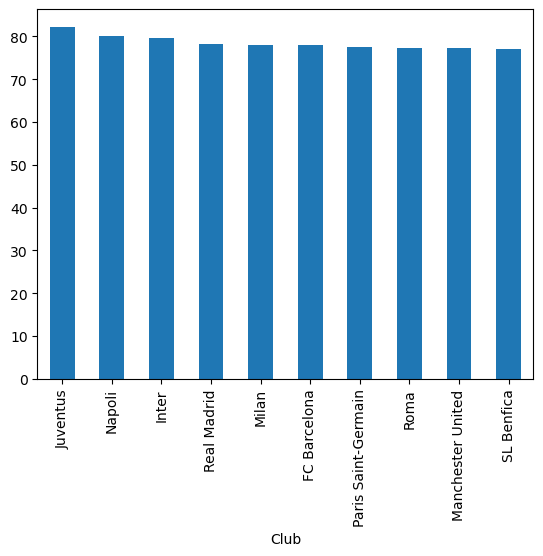

In [22]:
df_top10_club = df_club_rating.head(10)
df_top10_club.plot( x='Club', y='Average', kind='bar')

<b>16. What is the relationship between age and individual potential of the
player? Visualize the relationship with appropriate plot and Comment on
the same</b>

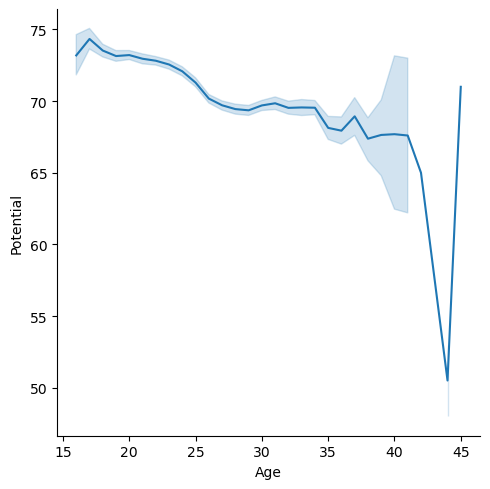

In [23]:
#plt.plot(df['Age'], df['Potential'])
#plt.show()

sns.relplot(x='Age', y='Potential', data=df, kind='line')
plt.show()

<ul>
    <li>From above plot we can observe that the age is inversely proportional to the potential of a player</li>
    <li>A player shows highest potential between ages 16 to 20 </li>
    <li>Thereafter, player potential decreases gradually till the age of 40</li>
    <li>After the age of 40, there is a sharp recline in the player's potential</li>
</ul>

<b>17. Which features directly contribute to the wages of the players?
Support your answer with a plot and a metric</b>

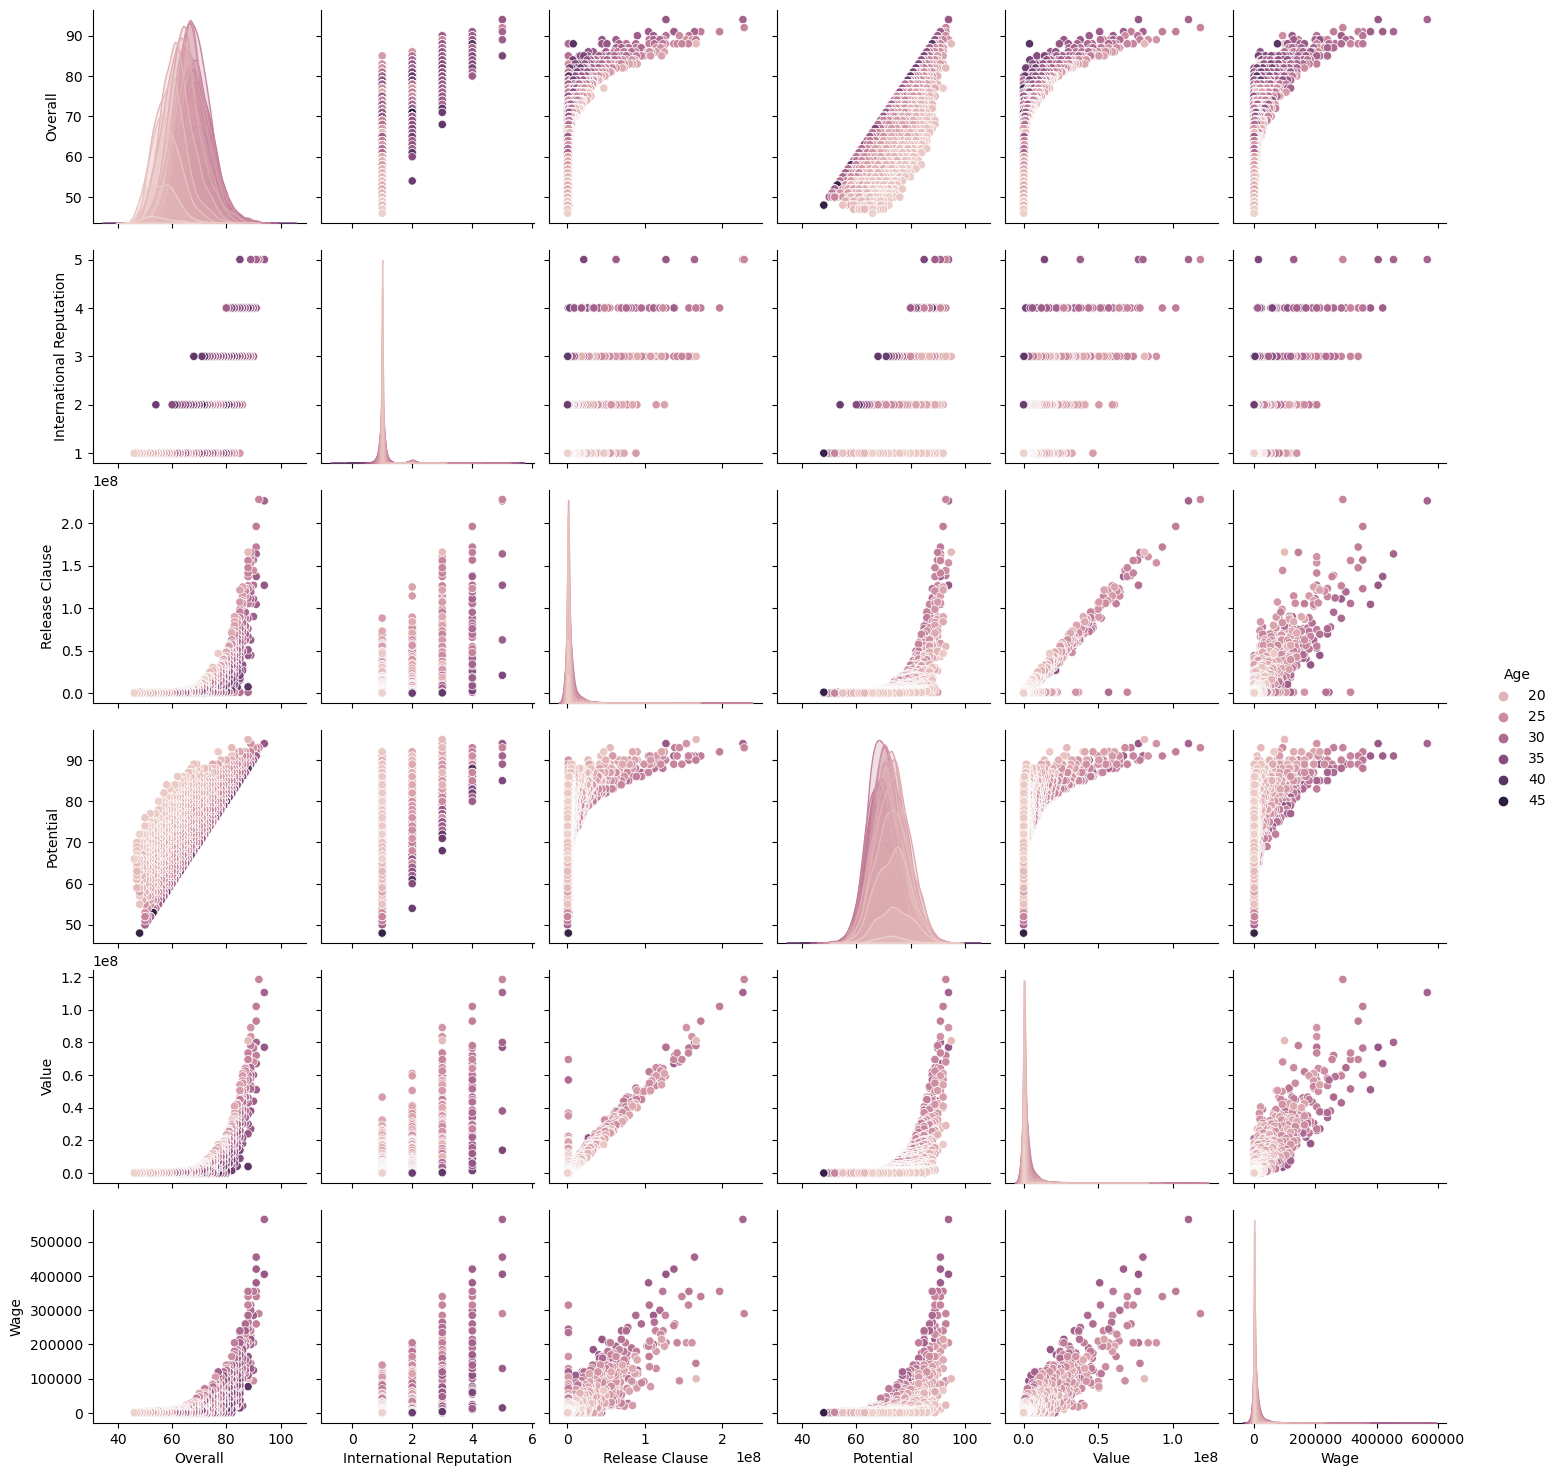

In [24]:
sns.pairplot(df[['Overall', 'International Reputation', 'Release Clause', 'Potential', 'Value', 'Wage', 'Age']], hue='Age')

<ul>
    <li>Wage has a positive correlation with Potential, Overall, Value, International Reputation, and Release Clause</li>
    <li>As the above factors increase, there is a significant increase in the wage of the players</li>
    <li>From the deepening Age hue, we can also see that up to a certain extent, age or experience can determine a player's wage, but as they grow older and potential decreases, the wage becomes less</li>
</ul>

<b>18. Find the position in the pitch where the maximum number of players
play and the position where the minimum number of players play? Display
it using a plot</b>

In [25]:
df['Position'].value_counts().sort_values(ascending=False).head(1)

ST    2212
Name: Position, dtype: int64

In [26]:
df['Position'].value_counts().sort_values(ascending=True).head(1)

LF    15
Name: Position, dtype: int64

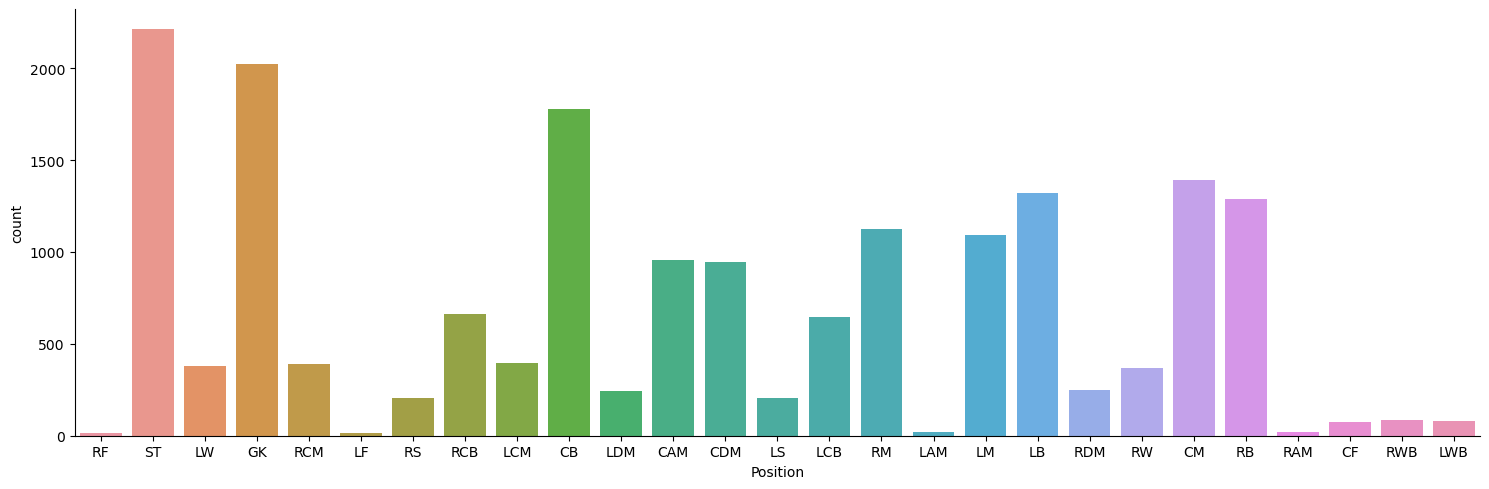

In [27]:
sns.catplot(data=df, x="Position", kind="count", aspect=3)

<ul>
    <li>Maximum number of players play in the Striker (ST) position (2212 players), followed by Goalkeepers (GK), and Defensive Central Back (CB)</li>
    <li>Minimum number of players play in the Left Forward (LF) position (15 players), followed by Right Forward (RF), and Right and Left Attacking Midfielder (RAM & LAM)</li>
</ul>


<b>19. How many players are from the club 'Juventus' and the wage is greater
than 200K? Display all the information of such players</b>

In [28]:
df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


<ul>
    <li>Only 3 players are from club 'Juventus' who earn a wage greater than €200K</li>
</ul>

<b>20. Generate a data frame containing Top 5 players by Overall rating for
each unique position</b>

In [29]:
df_top5 = df.sort_values('Overall', ascending=False).groupby('Position').head(5)
df_top5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,230465,Allan Bardinho,26,Brazil,75,75,Botafogo,7000000.0,22000.0,Left,...,71.0,23.0,33.0,32.0,12.0,8.0,17.0,8.0,15.0,13300000.0
2342,230276,Nicolás Formido,30,Brazil,74,74,Internacional,5500000.0,23000.0,Left,...,72.0,18.0,29.0,21.0,9.0,8.0,8.0,7.0,12.0,10500000.0
2330,230272,Kauã Abranches,34,Brazil,74,74,Paraná,2800000.0,19000.0,Right,...,68.0,34.0,58.0,57.0,8.0,10.0,12.0,20.0,19.0,5400000.0
2322,230267,Sebas Couteira,30,Brazil,74,74,Atlético Paranaense,5500000.0,14000.0,Right,...,71.0,32.0,52.0,41.0,15.0,13.0,12.0,10.0,9.0,10500000.0


<b>21. What is the average wage one can expect to pay for the Top 5 players
in every position?</b>

In [30]:
top5_avg_wage = df_top5.groupby('Position')['Wage'].mean()
top5_avg_wage.iloc[1:]

Position
CB     124800.0
CDM    199200.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    195400.0
LDM    138000.0
LF     123200.0
LM     169000.0
LS     130600.0
LW     261000.0
LWB     33000.0
RAM     46600.0
RB     155400.0
RCB    219000.0
RCM    257400.0
RDM    105000.0
RF     148000.0
RM     133000.0
RS     130400.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

<footer><center><b><i><u>End of Assignment</u></i></b></center></footer>